In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

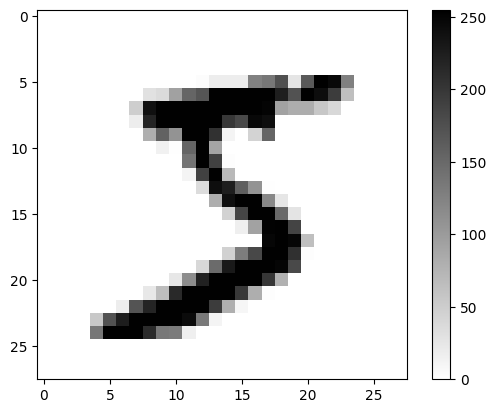

In [5]:
plt.figure
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()

In [6]:
train_images = train_images/255
test_images = test_images/255 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2676 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1155 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0806 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0583 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0477 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0236 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0193 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.016

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.0767 - accuracy: 0.9790 - 376ms/epoch - 1ms/step
Test accuracy: 0.9789999723434448


In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 764us/step


In [20]:
i=6
np.argmax(predictions[i]), test_labels[i]

(4, 4)

4 4


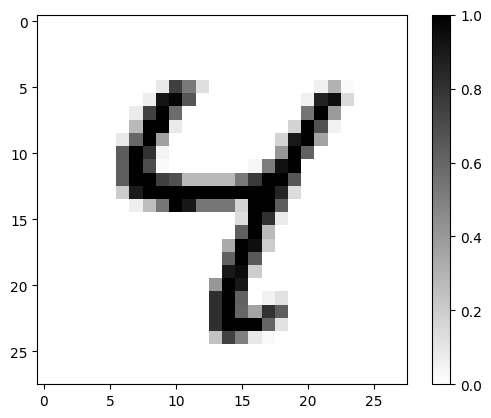

In [24]:
plt.figure()
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.colorbar()
print(np.argmax(predictions[i]), test_labels[i])

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)#cmap=plt.cm.binary

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

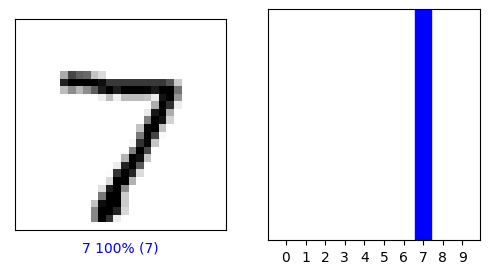

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

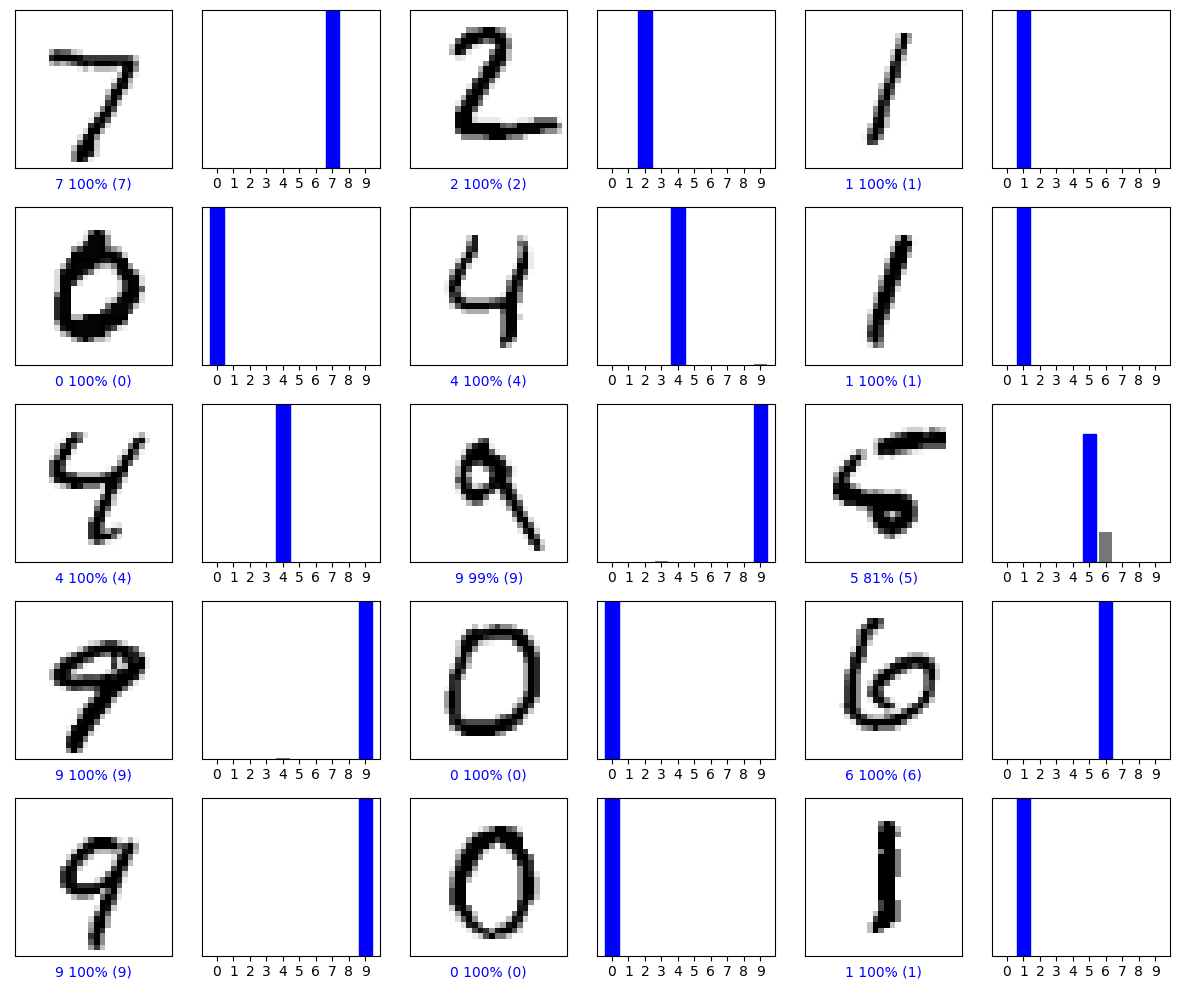

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

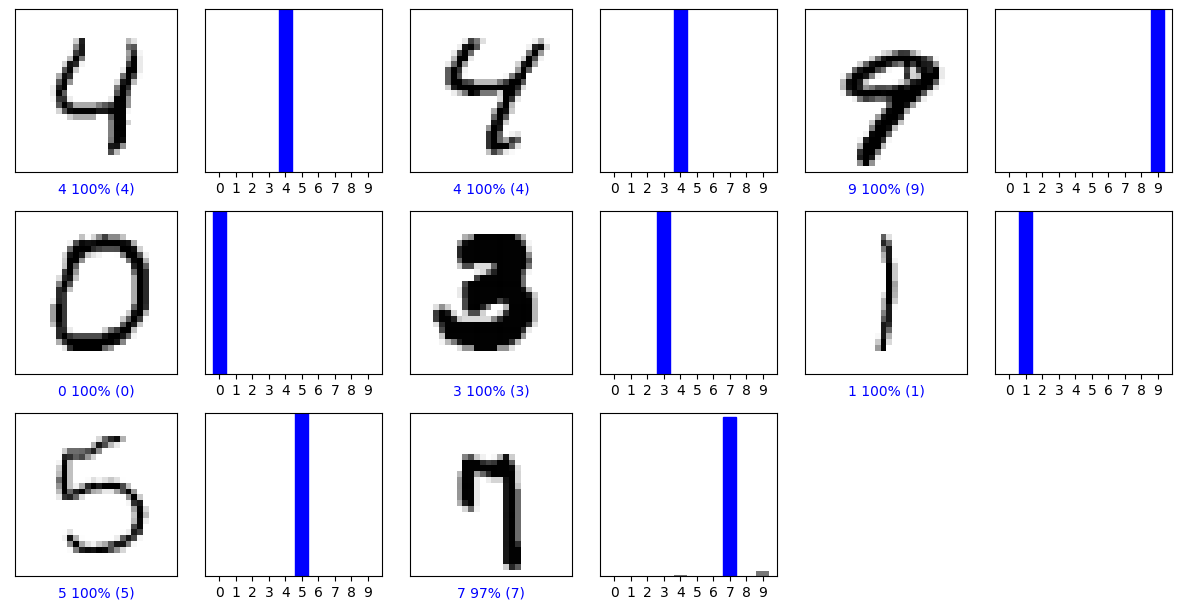

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
index = [4,6,9,10,200,40,53,80]
for i, im in zip(range(num_images), index):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(im, predictions[im], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(im, predictions[im], test_labels)
plt.tight_layout()
plt.show()